<a href="https://colab.research.google.com/github/rohandawar/-daysforcoding/blob/main/BirdSpeciesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, I am creating a multiclass classification model

In [ ]:
# Import the Libs

# Google
from google.colab import drive

# General
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
from matplotlib.image import imread

#Sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

#cv2
import cv2

# Keras
from keras.preprocessing import image
from keras.utils import img_to_array
from keras.utils import array_to_img
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from keras.models import Sequential

# Random
import random

# Os
from os import listdir

In [ ]:
# Mount the Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read/Locate the data in the drive
!ls /content/drive/MyDrive/DataSets/BirdSpecieesDataset

'AMERICAN GOLDFINCH'  'CARMINE BEE-EATER'  'EMPEROR PENGUIN'
'BARN OWL'	      'DOWNY WOODPECKER'    FLAMINGO


In [ ]:
# random.choice(sorted(listdir('/content/drive/MyDrive/DataSets/BirdSpecieesDataset/AMERICAN GOLDFINCH')))

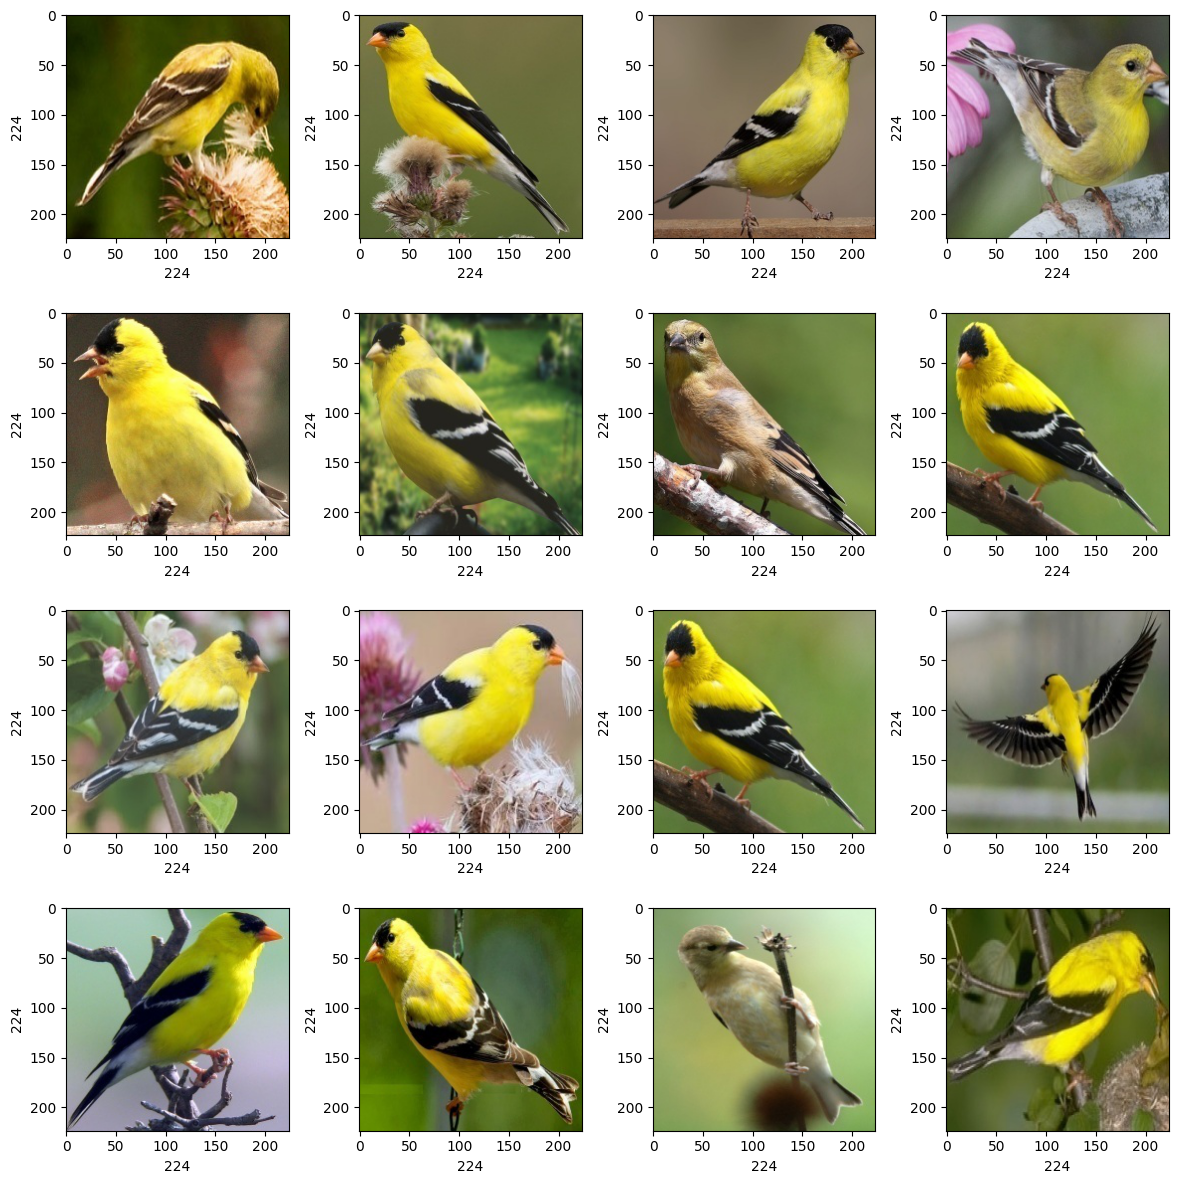

In [ ]:
# plotting some sample images to check the shape
plt.figure(figsize=(12,12))
path = '/content/drive/MyDrive/DataSets/BirdSpecieesDataset/AMERICAN GOLDFINCH'
for i in range(1,17):
  plt.subplot(4,4,i)
  plt.tight_layout()
  rand_img = imread(path + '/' + random.choice(sorted(listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1], fontsize=10)
  plt.ylabel(rand_img.shape[0], fontsize=10)

In [ ]:
# Set the sir for the data
dir = '/content/drive/MyDrive/DataSets/BirdSpecieesDataset'
root_dir = listdir(dir) # This would list all the sub-folders/Classes in the data
# Creating 2 empyt lists
image_list, label_list = [], []

In [ ]:
# Checking the subfloders
root_dir

['DOWNY WOODPECKER',
 'FLAMINGO',
 'BARN OWL',
 'AMERICAN GOLDFINCH',
 'EMPEROR PENGUIN',
 'CARMINE BEE-EATER']

In [ ]:
# Reading and conevrting the image sto numpy array
for directory in root_dir:
  for file in listdir(f'{dir}/{directory}'):
    image_path = f'{dir}/{directory}/{file}'
    image = cv2.imread(image_path)
    image = img_to_array(image)
    image_list.append(image)
    label_list.append(directory)

In [ ]:
# Chekcing the number of classes count
label_count = pd.DataFrame(label_list).value_counts()
label_count

AMERICAN GOLDFINCH    143
EMPEROR PENGUIN       139
DOWNY WOODPECKER      137
FLAMINGO              132
CARMINE BEE-EATER     131
BARN OWL              129
dtype: int64

In [ ]:
# Checking the number of classes
num_class = len(label_count)
num_class

6

In [ ]:
# Checking one sample image shape
image_list[2].shape

(224, 224, 3)

In [ ]:
# Checking the Label Shape
label_list = np.array(label_list)
label_list.shape

(811,)

In [ ]:
# Train & test Split
x_train,x_test,y_train,y_test = train_test_split(image_list, label_list, test_size=.2, random_state=10)

In [ ]:
# Normalize & reshape the data
x_train = np.array(x_train, dtype=np.float16)/255.0
x_test = np.array(x_test, dtype=np.float16)/255.0

# Reshape
x_train = x_train.reshape(-1,224,224,3)
x_test = x_test.reshape(-1,224,224,3)


In [ ]:
# Label Binarize
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

In [ ]:
y_train

array([[0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1]])

In [ ]:
# Splitting the validation & training dataset
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train, test_size=0.2)

In [ ]:
# model building
model = Sequential()

model.add(Conv2D(filters=8, kernel_size=(3,3), padding='same', input_shape=(224,224,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(num_class, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 74, 74, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 32)       0

In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(0.0005), metrics=['accuracy'])

In [ ]:
# Train the model
epochs = 50
batch_size = 128
history = model.fit(x_train,y_train, batch_size= batch_size, epochs = epochs, validation_data =( x_val,y_val))

Epoch 1/50
5/5 [==============================] - 13s 357ms/step - loss: 1.7473 - accuracy: 0.2278 - val_loss: 1.6450 - val_accuracy: 0.3538
Epoch 2/50
5/5 [==============================] - 1s 122ms/step - loss: 1.6297 - accuracy: 0.3591 - val_loss: 1.5195 - val_accuracy: 0.4769
Epoch 3/50
5/5 [==============================] - 1s 133ms/step - loss: 1.4020 - accuracy: 0.5521 - val_loss: 1.2913 - val_accuracy: 0.5923
Epoch 4/50
5/5 [==============================] - 1s 198ms/step - loss: 1.2077 - accuracy: 0.6216 - val_loss: 1.1326 - val_accuracy: 0.5538
Epoch 5/50
5/5 [==============================] - 1s 147ms/step - loss: 1.0384 - accuracy: 0.5869 - val_loss: 1.0646 - val_accuracy: 0.6077
Epoch 6/50
5/5 [==============================] - 1s 148ms/step - loss: 0.8985 - accuracy: 0.7027 - val_loss: 0.9159 - val_accuracy: 0.6769
Epoch 7/50
5/5 [==============================] - 1s 129ms/step - loss: 0.7888 - accuracy: 0.7587 - val_loss: 0.8342 - val_accuracy: 0.7231
Epoch 8/50
5/5 [===

In [ ]:
# Saving the model (Folders get created Automatically)
model.save('/content/drive/MyDrive/Model/BirdSpeciesPredcition/bird_model.h5')

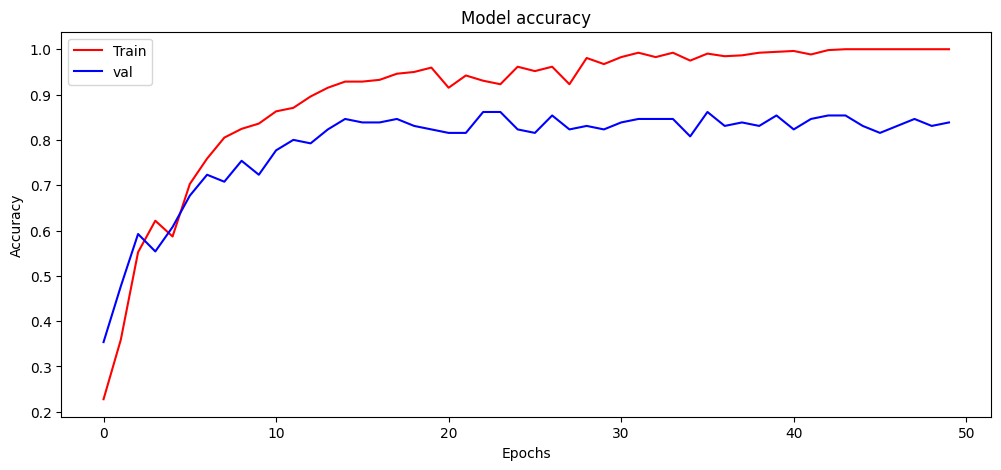

In [ ]:
# PLotting the training history
plt.figure(figsize=(12,5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'val'])
plt.show()

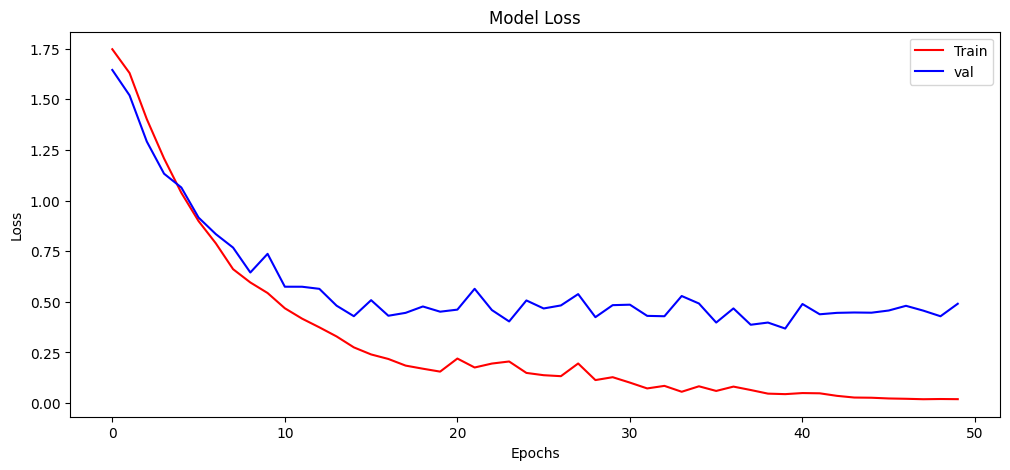

In [ ]:
# PLotting the training history
plt.figure(figsize=(12,5))
plt.plot(history.history['loss'], color='r')
plt.plot(history.history['val_loss'], color='b')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'val'])
plt.show()

In [ ]:
# Calculating test Accuracy
scores = model.evaluate(x_test, y_test)
print('Test Accuracy:', scores[1]*100)

6/6 [==============================] - 0s 18ms/step - loss: 0.5574 - accuracy: 0.8405
Test Accuracy: 84.04908180236816


In [ ]:
# Storing Predictions
y_pred = model.predict(x_test)

6/6 [==============================] - 0s 16ms/step


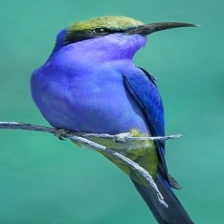

In [ ]:
# Plotting image to compare
img = array_to_img(x_test[3])
img

In [ ]:
labels = lb.classes_
print(labels)

['AMERICAN GOLDFINCH' 'BARN OWL' 'CARMINE BEE-EATER' 'DOWNY WOODPECKER'
 'EMPEROR PENGUIN' 'FLAMINGO']


In [ ]:
print('Originally: ', labels[np.argmax(y_test[5])])
print('Predicted: ', labels[np.argmax(y_pred[5])])

Originally:  DOWNY WOODPECKER
Predicted:  DOWNY WOODPECKER
